<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.


In [5]:
%load_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_logistica_ensamble as sle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df = pd.read_csv("datos/financial_data_target_ajustado.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,is_fraudulent,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,location_City-1,...,location_City-46,location_City-47,location_City-48,location_City-49,location_City-5,location_City-50,location_City-6,location_City-7,location_City-8,location_City-9
0,0,0,0,0.524610,43,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0.486978,61,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,1,0.524610,57,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,3,1,0.505313,59,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,4,1,0.513546,36,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
soporte = sle.AnalisisModelosClasificacion(df, "is_fraudulent")
soporte.ajustar_modelo("logistic_regression")
soporte.calcular_metricas("logistic_regression")

c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,train,test
accuracy,0.530125,0.52
precision,0.530023,0.518753
recall,0.530125,0.52
f1,0.528778,0.518459
kappa,0.059393,0.036133
auc,0.544774,0.524819
time_seconds,0.003545,NaN
n_jobs,None,NaN
modelo,logistic_regression,logistic_regression
tiempo_computacion(segundos),NaN,0.003545


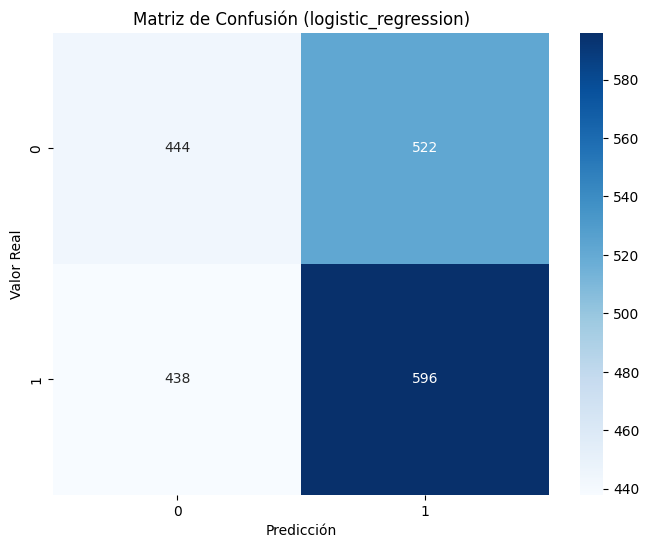

In [8]:
soporte.plot_matriz_confusion("logistic_regression")

c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


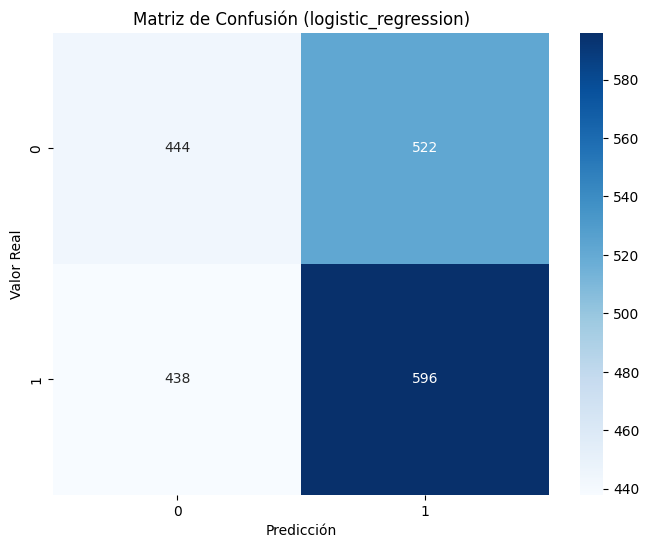

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo1\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


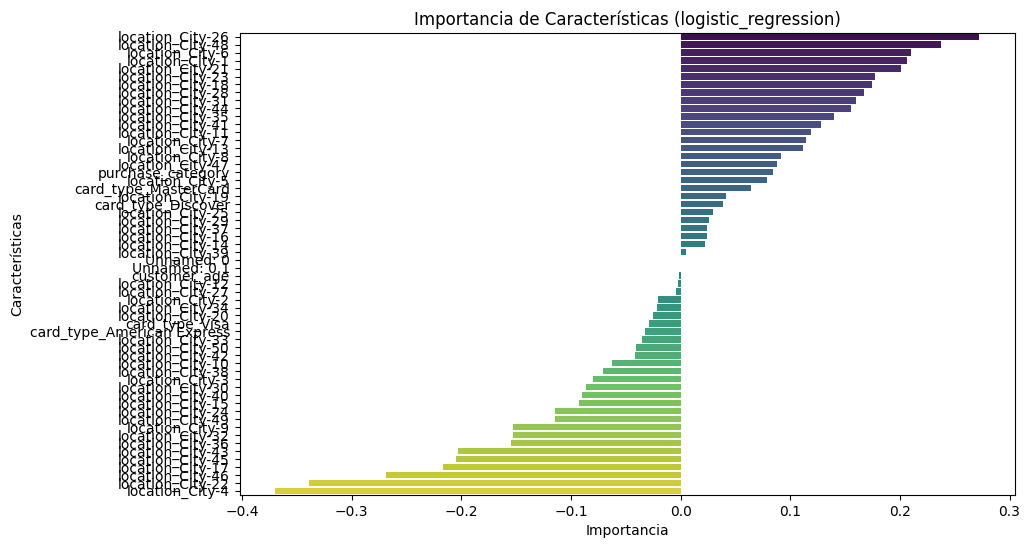

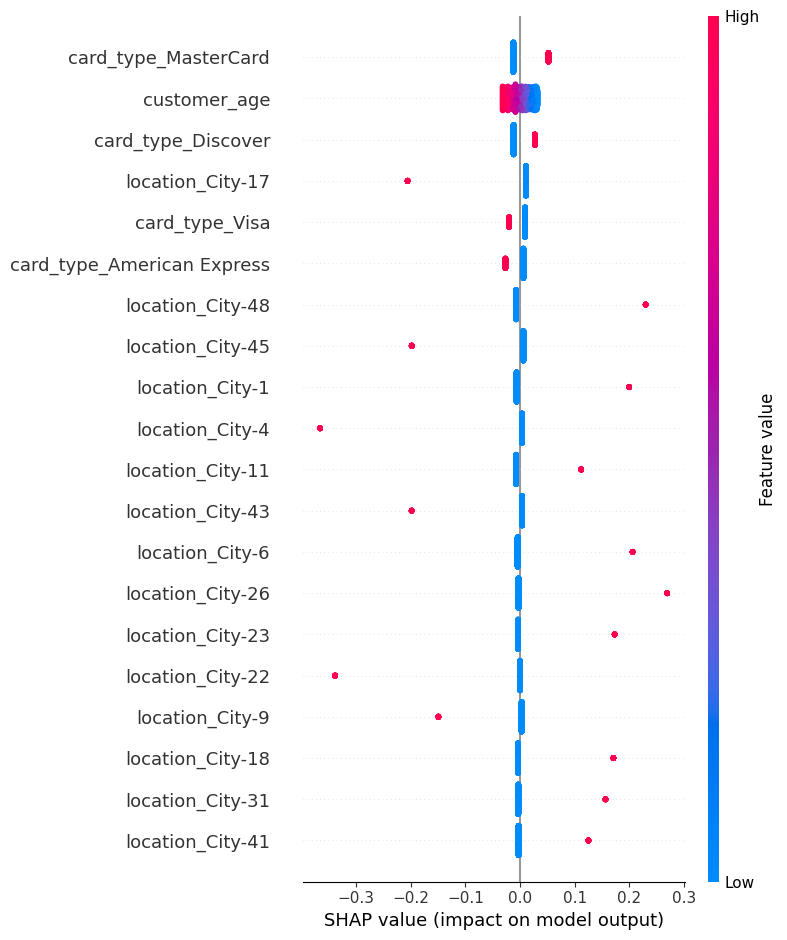

,train,test
accuracy,0.530125,0.52
precision,0.530023,0.518753
recall,0.530125,0.52
f1,0.528778,0.518459
kappa,0.059393,0.036133
auc,0.544774,0.524819
time_seconds,0.003002,NaN
n_jobs,None,NaN
modelo,logistic_regression,logistic_regression
tiempo_computacion(segundos),NaN,0.003002


El mejor modelo es DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5)


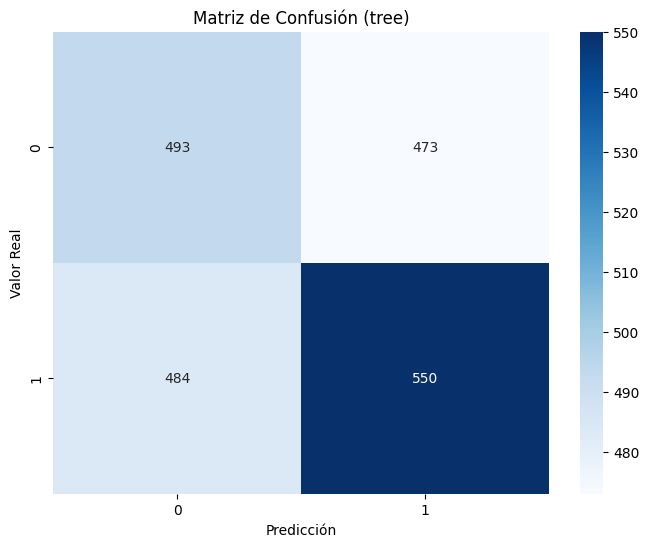

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo1\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


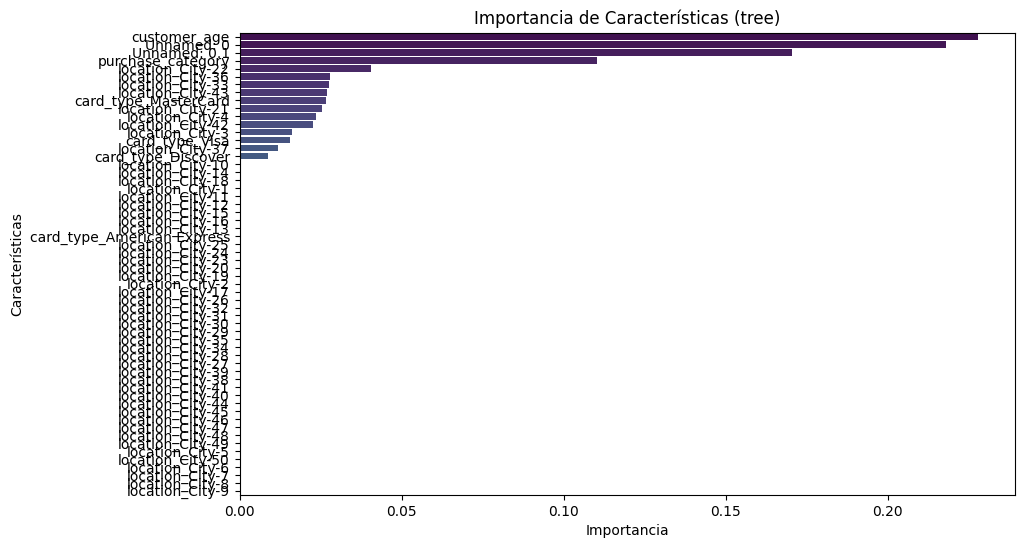

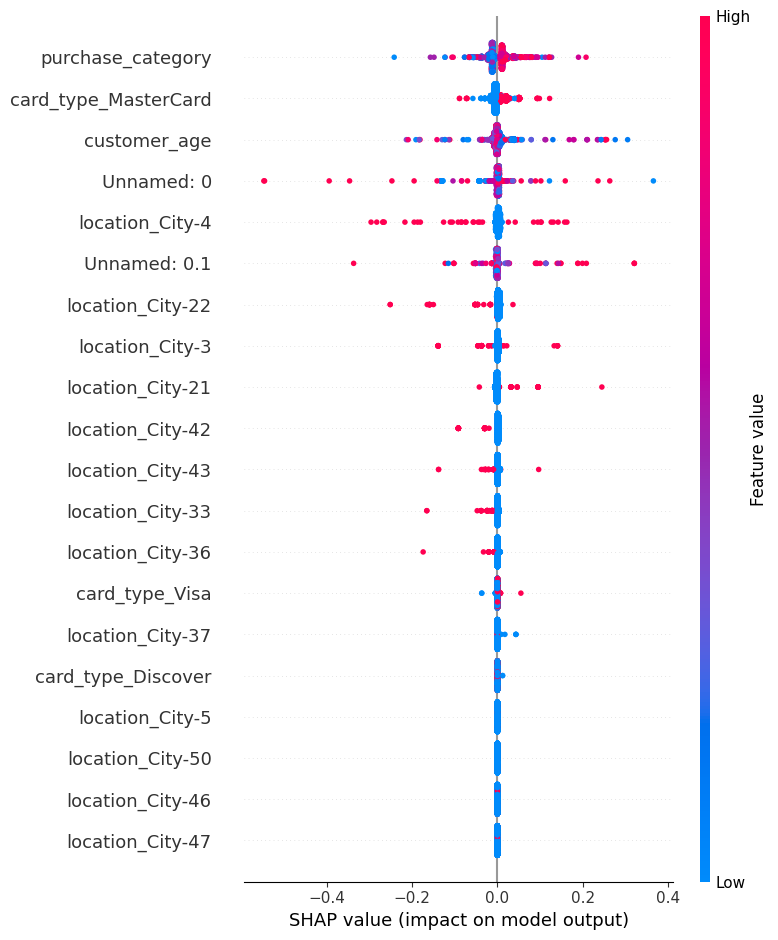

,train,test,train,test
accuracy,0.530125,0.52,0.533625,0.5215
precision,0.530023,0.518753,0.533686,0.521682
recall,0.530125,0.52,0.533625,0.5215
f1,0.528778,0.518459,0.53363,0.521575
kappa,0.059393,0.036133,0.067292,0.042251
auc,0.544774,0.524819,0.556719,0.518803
time_seconds,0.003002,NaN,0.003995,NaN
n_jobs,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree
tiempo_computacion(segundos),NaN,0.003002,NaN,0.003995


El mejor modelo es RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=50)


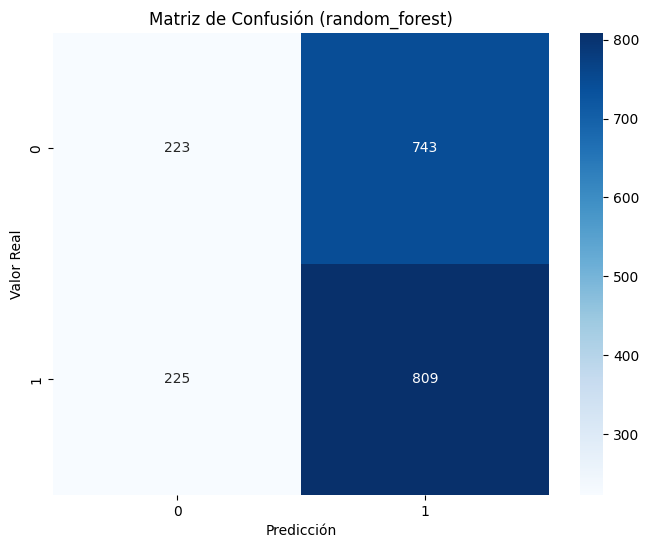

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo1\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


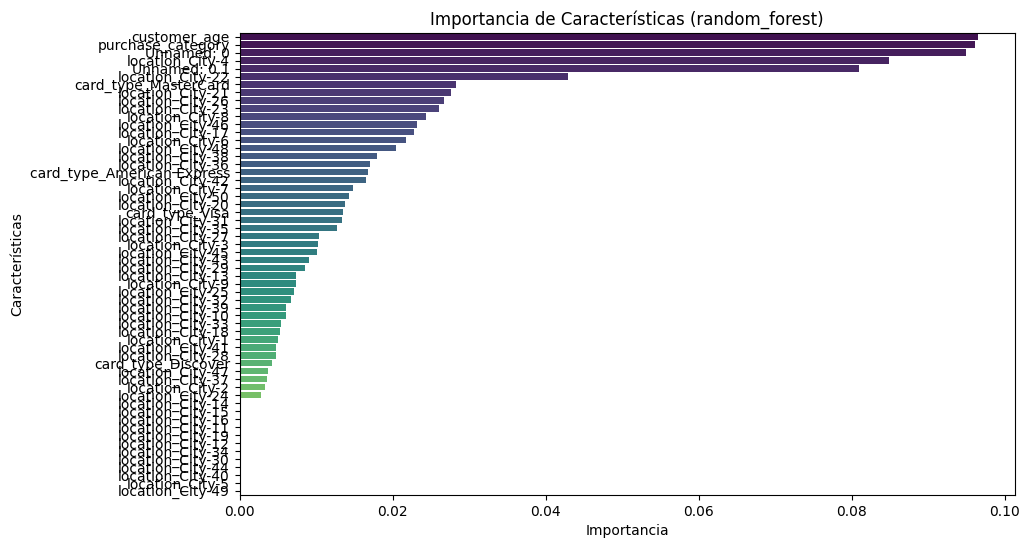

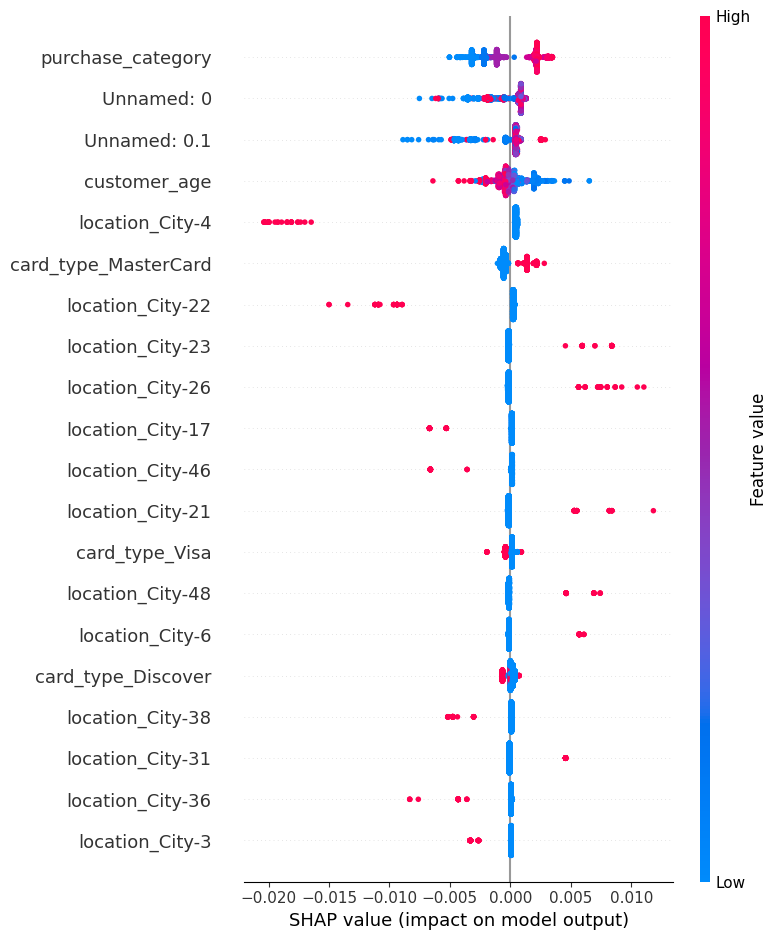

,train,test,train,test,train,test
accuracy,0.530125,0.52,0.533625,0.5215,0.528,0.516
precision,0.530023,0.518753,0.533686,0.521682,0.537347,0.509915
recall,0.530125,0.52,0.533625,0.5215,0.528,0.516
f1,0.528778,0.518459,0.53363,0.521575,0.487281,0.475821
kappa,0.059393,0.036133,0.067292,0.042251,0.051461,0.013485
auc,0.544774,0.524819,0.556719,0.518803,0.5534,0.524018
time_seconds,0.003002,NaN,0.003995,NaN,0.008998,NaN
n_jobs,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest
tiempo_computacion(segundos),NaN,0.003002,NaN,0.003995,NaN,0.008998


El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_split=10)


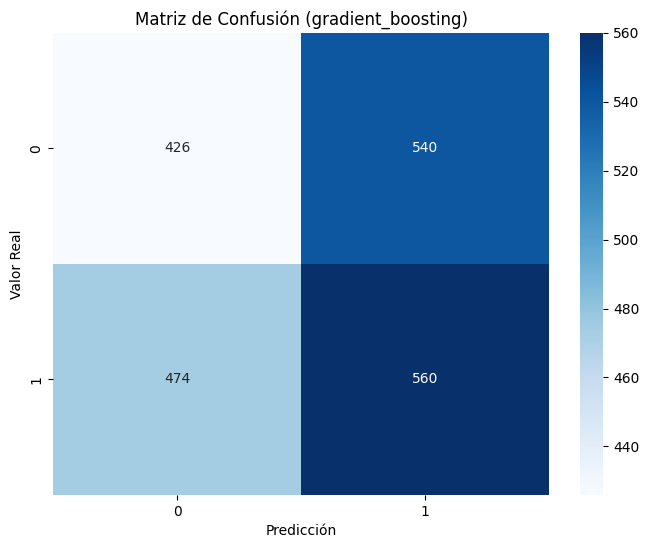

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo1\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


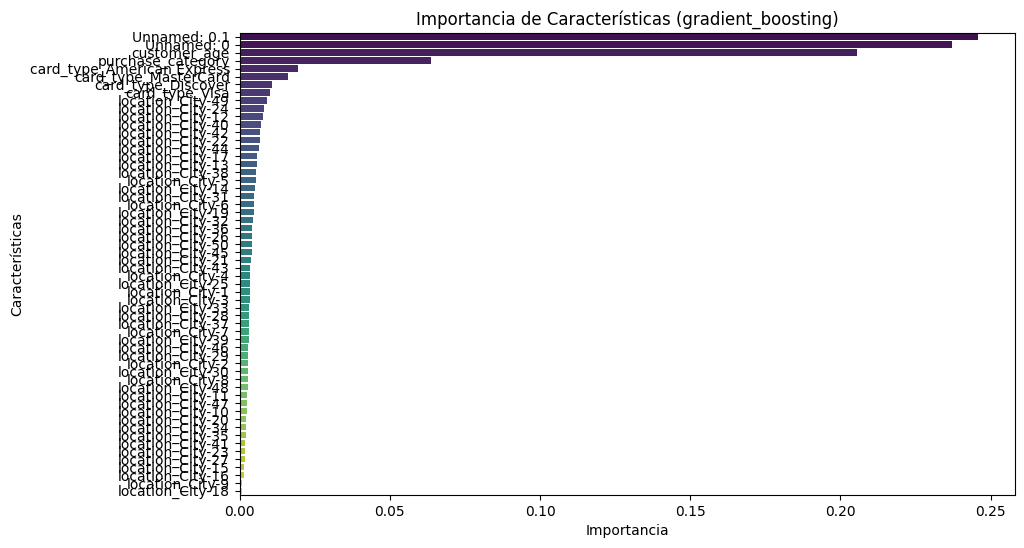

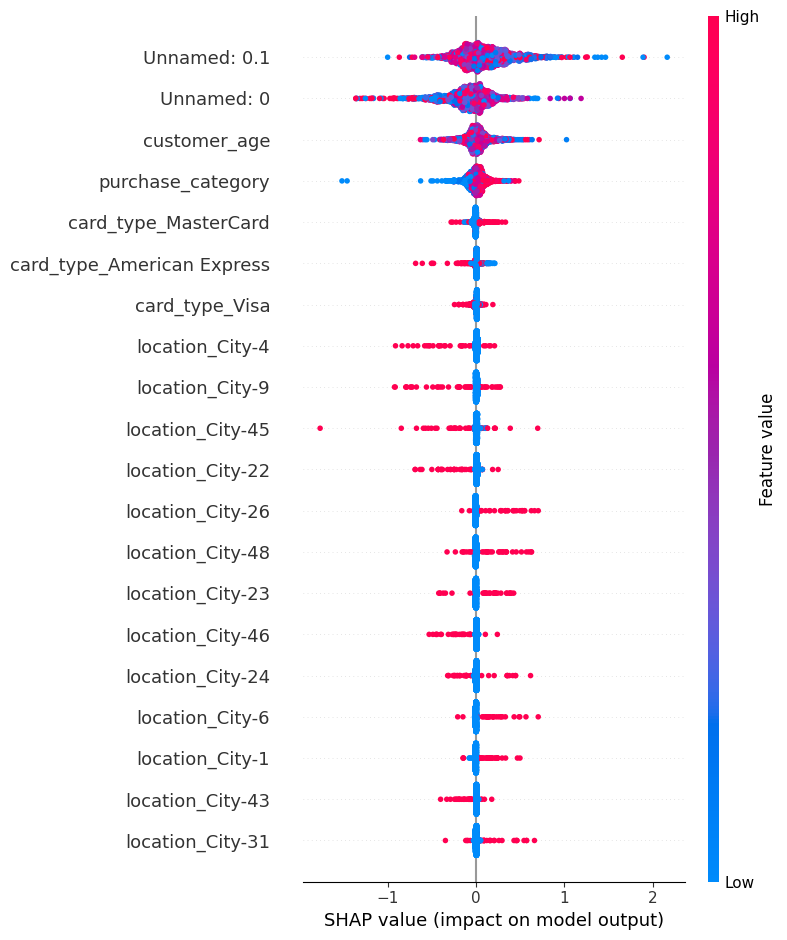

,train,test,train,test,train,test,train,test
accuracy,0.530125,0.52,0.533625,0.5215,0.528,0.516,0.76725,0.493
precision,0.530023,0.518753,0.533686,0.521682,0.537347,0.509915,0.768113,0.49182
recall,0.530125,0.52,0.533625,0.5215,0.528,0.516,0.76725,0.493
f1,0.528778,0.518459,0.53363,0.521575,0.487281,0.475821,0.766977,0.491874
kappa,0.059393,0.036133,0.067292,0.042251,0.051461,0.013485,0.534227,-0.017459
auc,0.544774,0.524819,0.556719,0.518803,0.5534,0.524018,0.861459,0.491001
time_seconds,0.003002,NaN,0.003995,NaN,0.008998,NaN,0.016468,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting
tiempo_computacion(segundos),NaN,0.003002,NaN,0.003995,NaN,0.008998,NaN,0.016468


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


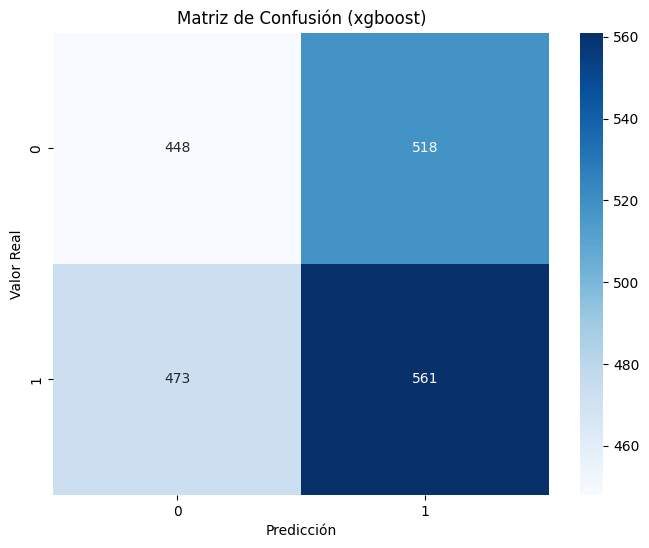

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo1\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


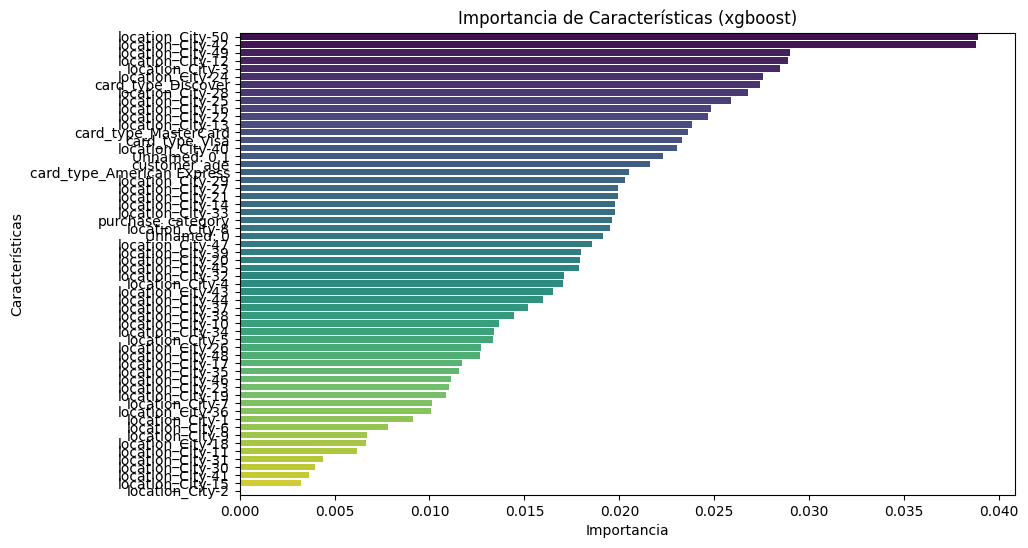

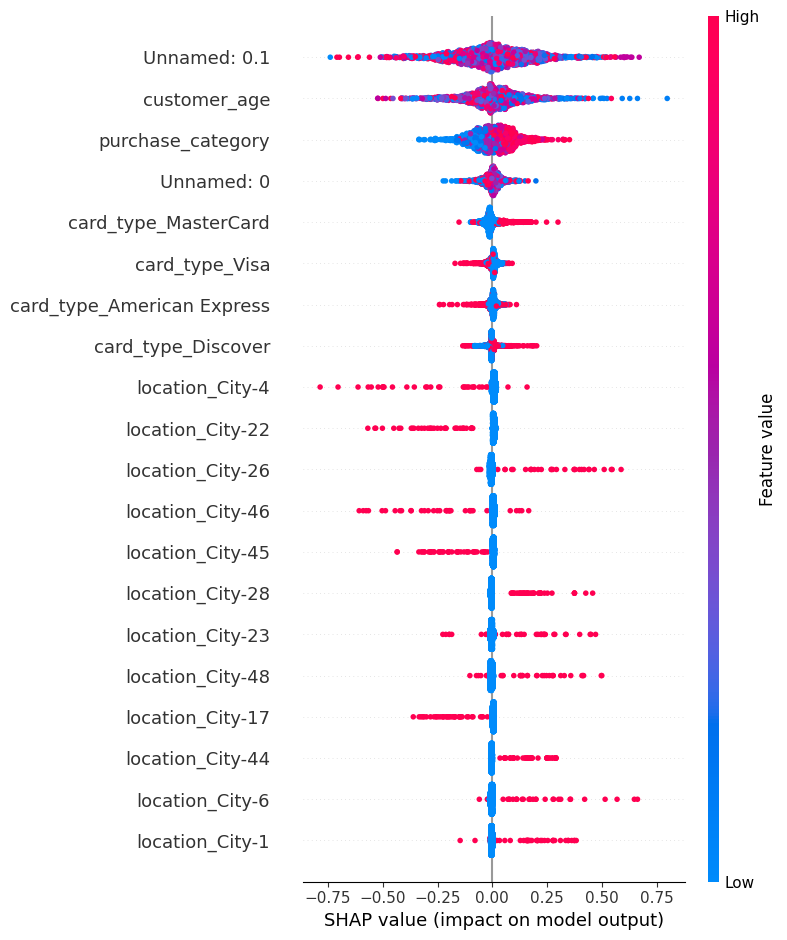

,train,test,train,test,train,test,train,test,train,test
accuracy,0.530125,0.52,0.533625,0.5215,0.528,0.516,0.76725,0.493,0.693,0.5045
precision,0.530023,0.518753,0.533686,0.521682,0.537347,0.509915,0.768113,0.49182,0.693442,0.503746
recall,0.530125,0.52,0.533625,0.5215,0.528,0.516,0.76725,0.493,0.693,0.5045
f1,0.528778,0.518459,0.53363,0.521575,0.487281,0.475821,0.766977,0.491874,0.692696,0.503868
kappa,0.059393,0.036133,0.067292,0.042251,0.051461,0.013485,0.534227,-0.017459,0.385668,0.006331
auc,0.544774,0.524819,0.556719,0.518803,0.5534,0.524018,0.861459,0.491001,0.766037,0.509925
time_seconds,0.003002,NaN,0.003995,NaN,0.008998,NaN,0.016468,NaN,0.031677,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting,xgboost,xgboost
tiempo_computacion(segundos),NaN,0.003002,NaN,0.003995,NaN,0.008998,NaN,0.016468,NaN,0.031677


,accuracy,precision,recall,f1,kappa
train,0.530125,0.530023,0.530125,0.528778,0.059393
test,0.52,0.518753,0.52,0.518459,0.036133
train,0.533625,0.533686,0.533625,0.53363,0.067292
test,0.5215,0.521682,0.5215,0.521575,0.042251
train,0.528,0.537347,0.528,0.487281,0.051461
test,0.516,0.509915,0.516,0.475821,0.013485
train,0.76725,0.768113,0.76725,0.766977,0.534227
test,0.493,0.49182,0.493,0.491874,-0.017459
train,0.693,0.693442,0.693,0.692696,0.385668
test,0.5045,0.503746,0.5045,0.503868,0.006331


In [9]:
lista_modelos = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_metricas = pd.DataFrame()
for modelo in lista_modelos:
    # soporte = sle.AnalisisModelosClasificacion(df, "is_fraudulent")
    soporte.ajustar_modelo(modelo)
    df_temp = soporte.calcular_metricas(modelo)
    df_metricas = pd.concat([df_metricas, df_temp], axis=1)
    soporte.plot_matriz_confusion(modelo)
    soporte.importancia_predictores(modelo)
    soporte.plot_shap_summary(modelo)
    display(df_metricas)
df_metricas.head().T

In [10]:
df_resultados_colores = df_metricas.T.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(sle.color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo,tiempo_computacion(segundos),nucleos_usados
0,0.530125,0.530023,0.530125,0.528778,0.059393,0.544774,0.003002,None,logistic_regression,nan,nan
1,0.520000,0.518753,0.520000,0.518459,0.036133,0.524819,nan,nan,logistic_regression,0.003002,None
2,0.533625,0.533686,0.533625,0.533630,0.067292,0.556719,0.003995,16,tree,nan,nan
3,0.521500,0.521682,0.521500,0.521575,0.042251,0.518803,nan,nan,tree,0.003995,16
4,0.528000,0.537347,0.528000,0.487281,0.051461,0.553400,0.008998,None,random_forest,nan,nan
5,0.516000,0.509915,0.516000,0.475821,0.013485,0.524018,nan,nan,random_forest,0.008998,None
6,0.767250,0.768113,0.767250,0.766977,0.534227,0.861459,0.016468,16,gradient_boosting,nan,nan
7,0.493000,0.491820,0.493000,0.491874,-0.017459,0.491001,nan,nan,gradient_boosting,0.016468,16
8,0.693000,0.693442,0.693000,0.692696,0.385668,0.766037,0.031677,None,xgboost,nan,nan
9,0.504500,0.503746,0.504500,0.503868,0.006331,0.509925,nan,nan,xgboost,0.031677,None
